
# Modeling: binary classification


<h2> Table of contents </h2>

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of functions](#Functions)
3. [Modeling](#Modeling)
    1. [Import of data](#Data)
    2. [Split of data](#Split)
    3. [Training](#Training)
        1. [Decision Tree](#DecisionTree)
        2. [Random Forest](#Random)
        3. [SVM](#SVM)
4. [Evaluation](#Evaluation)
    1. [Decision Tree](#DecisionTreeEvaluation)
    2. [Random Forest](#RandomForestEvaluation)
    3. [SVM](#SVMEvaluation)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate the performance analysis of models. As output, the functions provide graphs, metrics, and basic tables used in the analysis process. Pay attention to the functions parameters:

- **final_model**: developed model
    > Save as **final_model_*type***

&nbsp;

- **model**: type of developed model:
    - **lgbm**: Light Gradient Boosting Machine;
    - **loglin**: Linear Regression;
    - **logreg**: Logistic Regression;

&nbsp;

- **X**: test or validation database;

&nbsp;

- **y**: test or validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
<section id="Packages">
    

In [11]:
#!pip install PySimpleGUI

In [13]:
from sklearn.datasets import load_breast_cancer

import joblib
from fast_ml.model_development import train_valid_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# graphics ands tables
from scipy import stats
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# interative interface
import ipywidgets as widgets
from IPython.display import display


---



<section id="Functions">
   <h2> 2. Import of functions </h2>
<section id="Functions">


In [16]:
import os
print(os.getcwd())

/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/evaluation


In [17]:
%run "/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/evaluation/model_analysis-evaluation-functions.ipynb"


---



<section id="Modeling">
    <h2> 3. Modeling </h2>
<section id="Modeling"> 
    


<section id="Data">
    <h3> 3.1. Import of data </h3>
<section id="Data"> 
    

In [21]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [22]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [23]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [24]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<section id="Split">
    <h3> 3.1. Split of data </h3>
<section id="Split"> 
    

In [26]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(df_origin,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


<section id="Training">
    <h3> 3.1. Training </h3>
<section id="Training"> 
    


<section id="DecisionTree">
    <h4> 3.1.1. Decision Tree Classifier </h4>
<section id="DecisionTree"> 
    

In [ ]:
final_model_dtc = DecisionTreeClassifier(criterion='gini', random_state=3)

final_model_dtc.fit(X_train, y_train)

y_pred_test_dtc  = final_model_dtc.predict(X_test)
y_pred_validation_dtc = final_model_dtc.predict(X_validation)


<section id="RandomForest">
    <h4> 3.1.2. Random Forest </h4>
<section id="RandomForest"> 
    

In [ ]:
final_model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=3)
final_model_rf.fit(X_train, y_train)

y_pred_test_rf = final_model_rf.predict(X_test)
y_pred_validation_rf = final_model_rf.predict(X_validation)


<section id="SVM">
    <h4> 3.1.3. SVM </h4>
<section id="SVM"> 
    

In [ ]:
final_model_svm = SVC(kernel='linear', random_state=3)

final_model_svm.fit(X_train, y_train)

y_pred_test_svm = final_model_svm.predict(X_test)
y_pred_validation_svm = final_model_svm.predict(X_validation)


---



<section id="Evaluation">
    <h2> 4. Evaluation </h2>
<section id="Evaluation"> 
    


<section id="DecisionTreeEvaluation">
    <h3> 3.1.1. Decision Tree Classifier </h3>
<section id="DecisionTreeEvaluation"> 
    

In [ ]:
y_pred_proba = pd.DataFrame(y_pred_validation_dtc)

ROC AUC:  100.0
PR AUC:  1.0
Confusion matrix:
[[0.40350877 0.        ]
 [0.         0.59649123]]


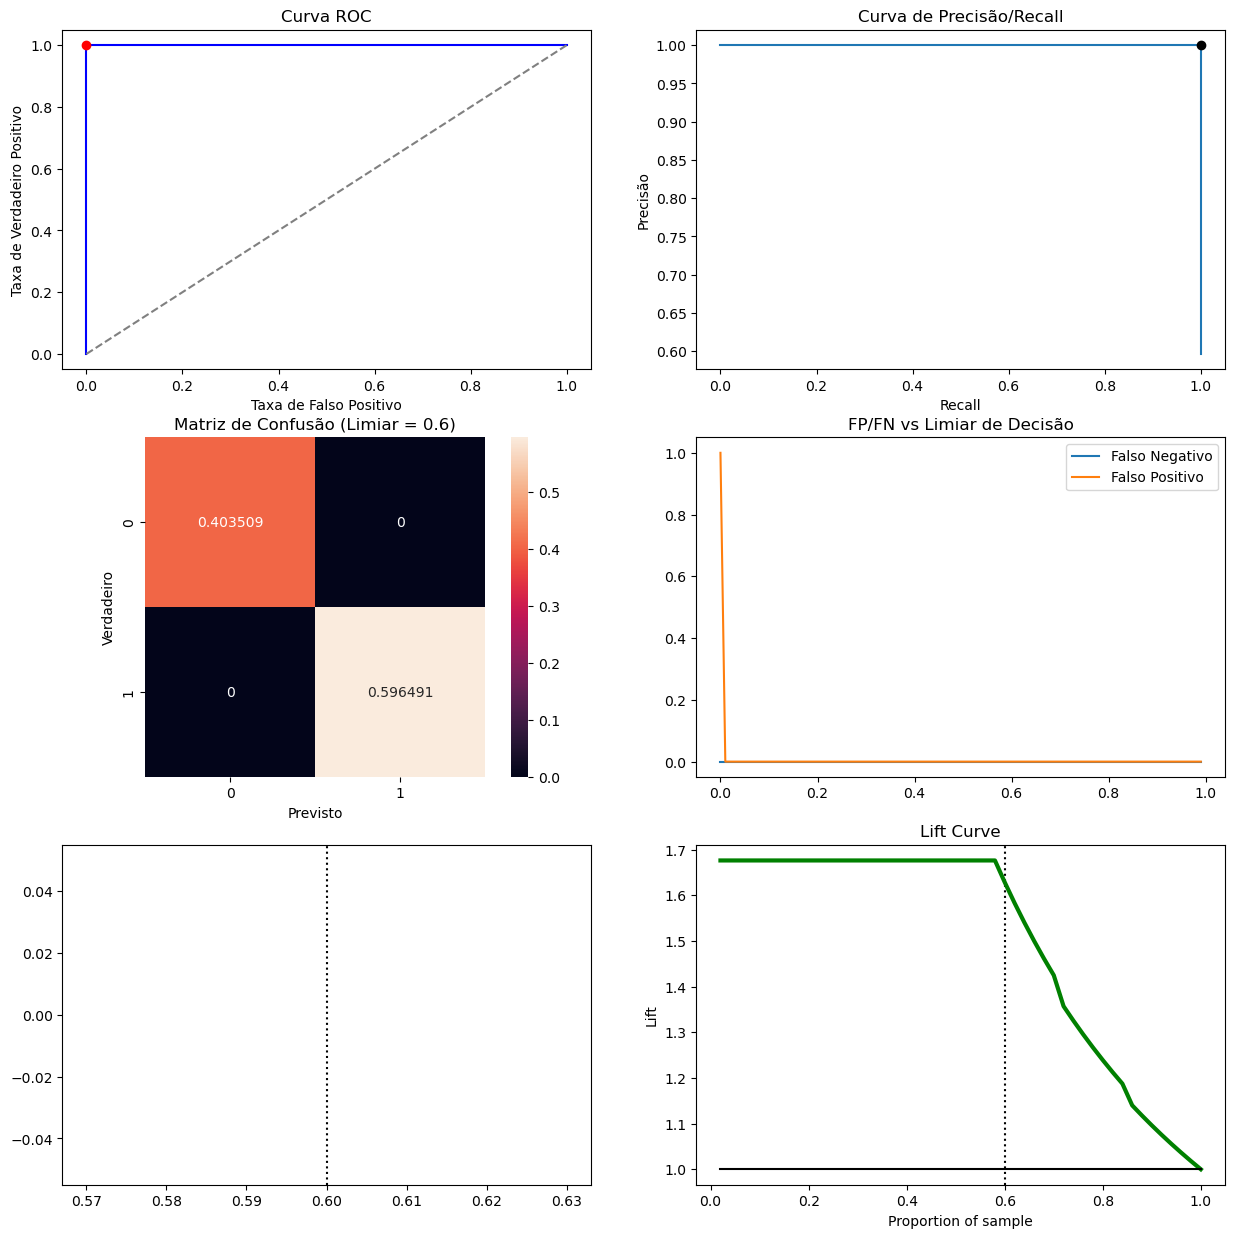

In [89]:
evaluation_BinaryClassification_graphs('dtc', y_pred_validation_dtc, 0.6, X_validation)


<section id="RandomForestEvaluation">
    <h3> 3.1.2. Random Forest </h3>
<section id="RandomForestEvaluation"> 
    

In [83]:
y_pred_proba = pd.DataFrame(y_pred_validation_rf)

ROC AUC:  100.0
PR AUC:  1.0
Confusion matrix:
[[0.31578947 0.        ]
 [0.         0.68421053]]


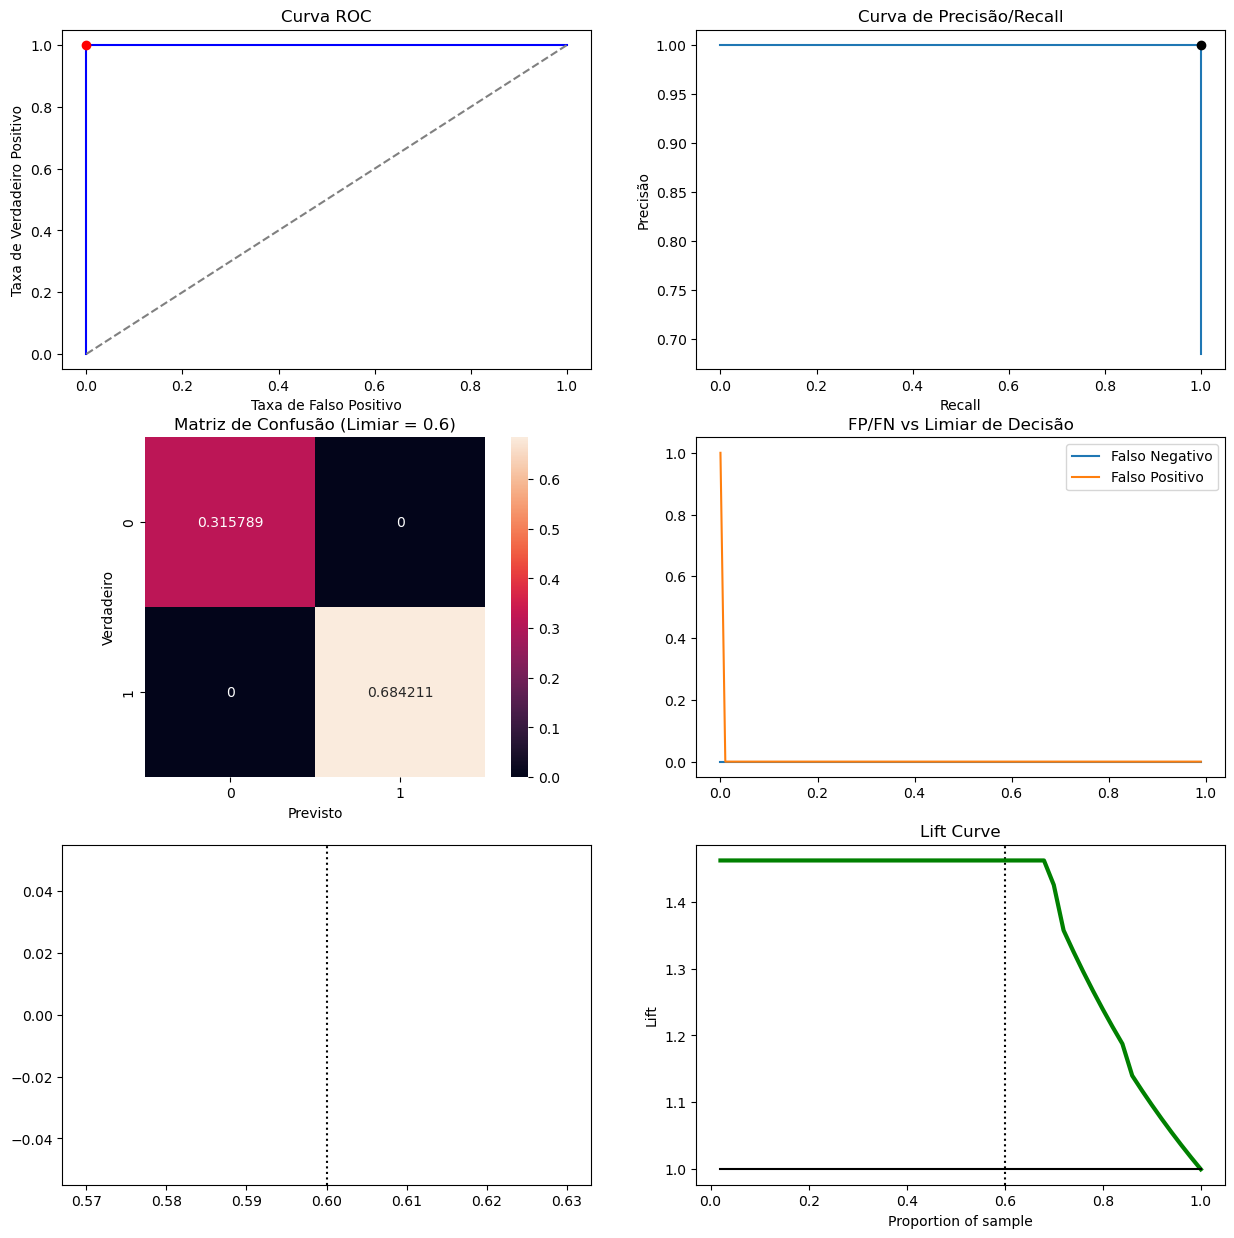

In [84]:
evaluation_BinaryClassification_graphs('rf', y_pred_validation_rf, 0.6, X_validation)


<section id="SVMEvaluation">
    <h3> 3.1.3. SVM </h3>
<section id="SVMEvaluation"> 
    

In [79]:
y_pred_proba = pd.DataFrame(y_pred_validation_svm)

ROC AUC:  100.0
PR AUC:  1.0
Confusion matrix:
[[0.38596491 0.        ]
 [0.         0.61403509]]


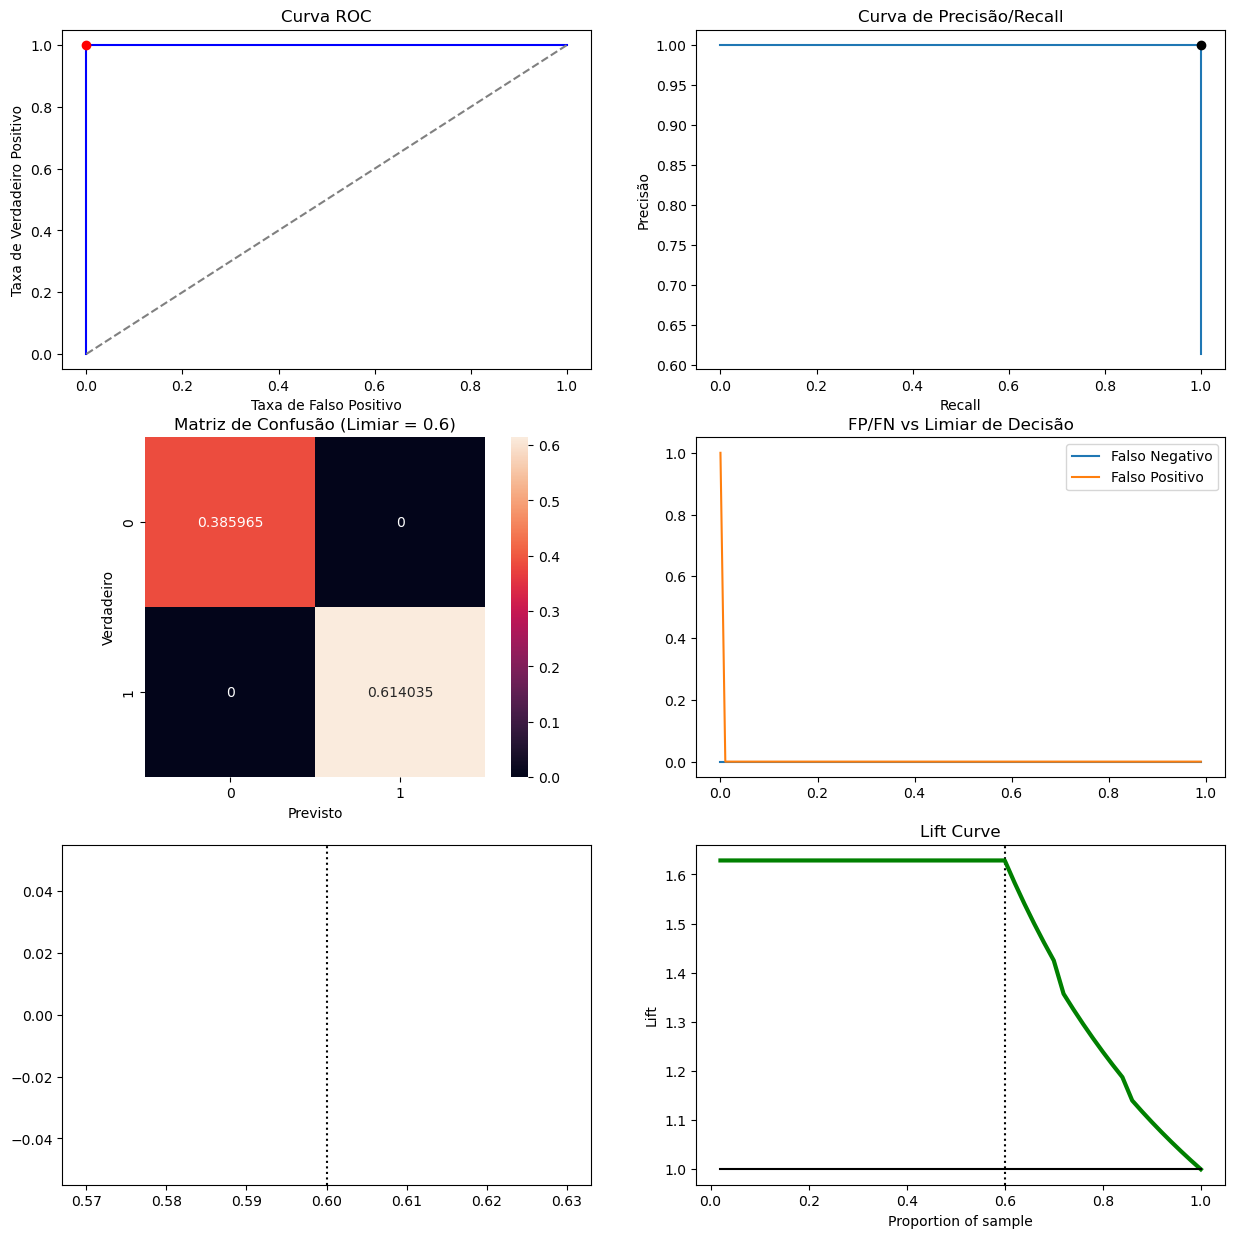

In [81]:
evaluation_BinaryClassification_graphs('svm', y_pred_validation_svm, 0.6, X_validation)

ROC AUC:  100.0
PR AUC:  1.0
Confusion matrix:
[[0.66666667 0.        ]
 [0.         0.33333333]]


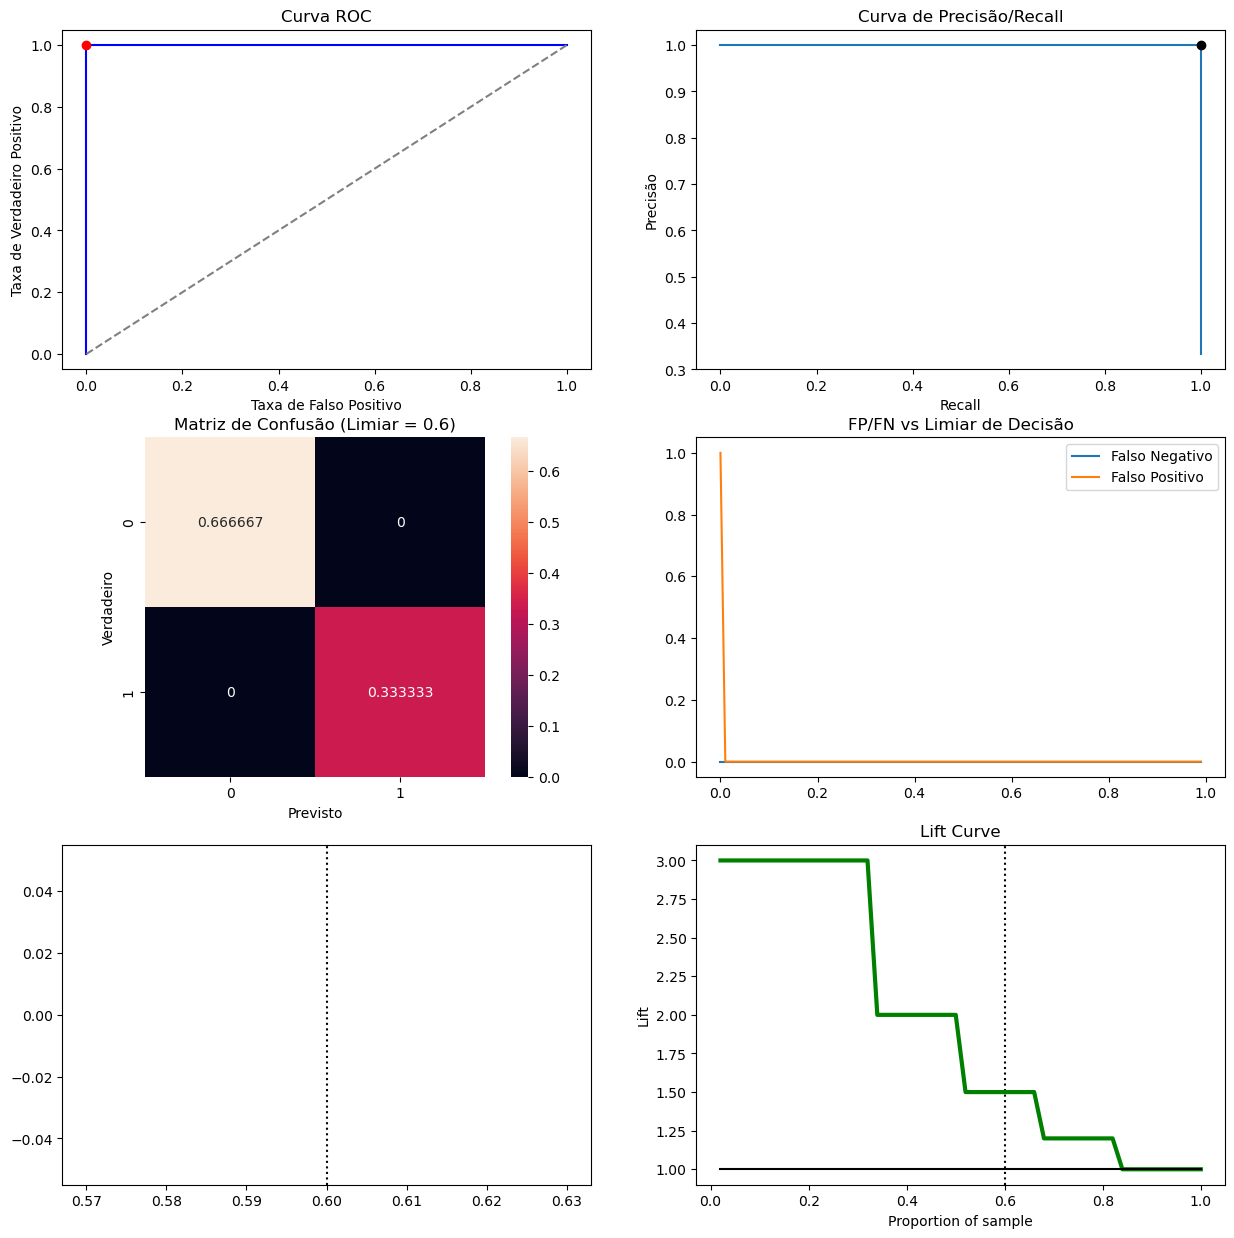

In [127]:
evaluation_BinaryClassification_graphs('svm', y_pred_test_svm, 0.6, X_test)